In [172]:
import xgboost as xgb
import warnings


warnings.filterwarnings("ignore")


In [173]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import plot_importance
from matplotlib import pyplot


In [174]:
from xgboost import XGBClassifier
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")


In [175]:
dataset.shape
dataset[:,7].shape

(768,)

In [176]:
X=dataset[:,0:8]
Y=dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=7)


In [177]:
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, Y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, Y_test, enable_categorical=True)

# Cross-Validation

In [178]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]


n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=10,
   early_stopping_rounds=20
)



In [179]:
results.head()



,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.393525,0.002975,0.441846,0.014141
1,0.337773,0.005253,0.430053,0.016715
2,0.296586,0.005958,0.426638,0.021409


In [180]:
best_rmse = results['test-rmse-mean'].min()

best_rmse

0.42663773509683545

# Model-Training

In [181]:
n = 10000

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	validation-rmse:0.44020	train-rmse:0.39505


[50]	validation-rmse:0.43167	train-rmse:0.03201
[100]	validation-rmse:0.43318	train-rmse:0.00422
[150]	validation-rmse:0.43359	train-rmse:0.00149
[189]	validation-rmse:0.43359	train-rmse:0.00149


# Import Model

In [182]:
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, Y_train), (X_test, Y_test)]
evals_result = {}  # Dictionary to store evaluation results


model.fit(
    X_train, 
    Y_train, 
    early_stopping_rounds=10, 
    eval_metric="logloss", 
    eval_set=eval_set,
    verbose=True,

    )
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate prediction
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.52061	validation_1-logloss:0.57274
[1]	validation_0-logloss:0.44678	validation_1-logloss:0.53462
[2]	validation_0-logloss:0.39816	validation_1-logloss:0.50815
[3]	validation_0-logloss:0.35458	validation_1-logloss:0.49274
[4]	validation_0-logloss:0.32583	validation_1-logloss:0.48162
[5]	validation_0-logloss:0.29454	validation_1-logloss:0.48037
[6]	validation_0-logloss:0.27536	validation_1-logloss:0.48404


[7]	validation_0-logloss:0.25573	validation_1-logloss:0.48366
[8]	validation_0-logloss:0.24207	validation_1-logloss:0.48571
[9]	validation_0-logloss:0.23084	validation_1-logloss:0.48744
[10]	validation_0-logloss:0.21817	validation_1-logloss:0.48764
[11]	validation_0-logloss:0.20372	validation_1-logloss:0.48601
[12]	validation_0-logloss:0.19647	validation_1-logloss:0.49566
[13]	validation_0-logloss:0.18598	validation_1-logloss:0.50184
[14]	validation_0-logloss:0.17496	validation_1-logloss:0.51328
[15]	validation_0-logloss:0.16979	validation_1-logloss:0.51348
Accuracy: 79.92%


In [183]:
Y_test[:10,]

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 0.])

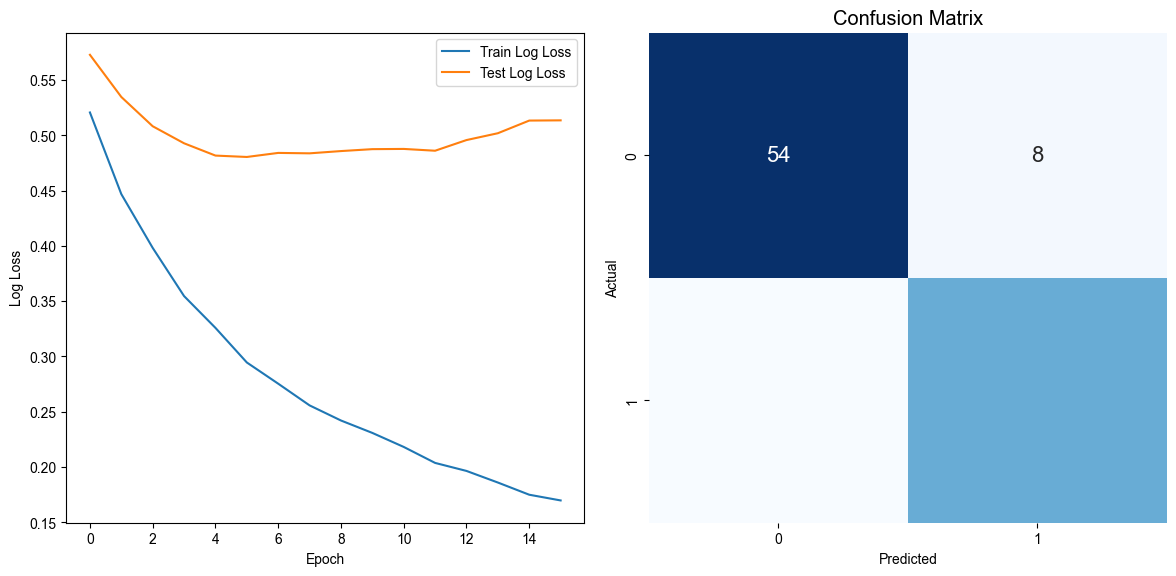

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Extract log loss values for training and test sets
results = model.evals_result()
train_logloss = results['validation_0']['logloss']
test_logloss = results['validation_1']['logloss']

X_test=X_test[:100,]
Y_test=Y_test[:100,]
# Make predictions on the test set
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

# Plot the log loss values over each epoch
plt.figure(figsize=(12, 6))


# Plot the log loss values over each epoch
plt.subplot(1, 2, 1)
plt.plot(range(len(train_logloss)), train_logloss, label='Train Log Loss')
plt.plot(range(len(test_logloss)), test_logloss, label='Test Log Loss')

# Set labels and legend
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

plt.subplot(1, 2, 2)
sns.set(font_scale=1.2)  # Adjust the font scale if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


# Show the plot
plt.tight_layout()

plt.show()






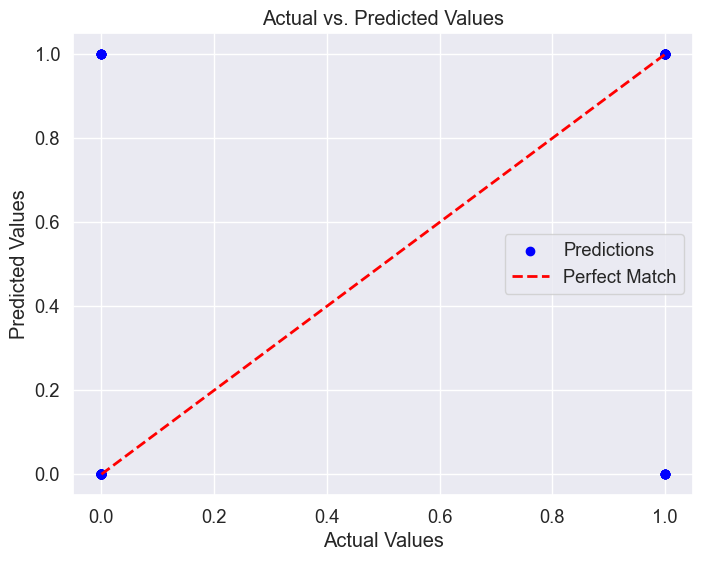

In [185]:
import matplotlib.pyplot as plt

# Assuming you have your model and predictions ready
# model: Your trained regression model
# y_pred: Predicted values
# y_actual: Actual target values
y_actual=Y_test
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, c='blue', label='Predictions')

# Add a line representing a perfect match (y_pred = y_actual)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', lw=2, label='Perfect Match')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.show()


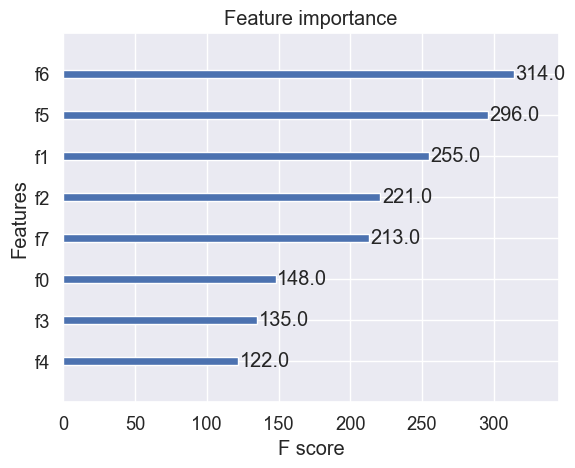

In [186]:
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")
X=dataset[:,0:8]
y=dataset[:,8]

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
plot_importance(model)
pyplot.show()

In [187]:
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]
# split data into train and test sets

# fit model no training data
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f with: %r" % (mean,param))



Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best: -0.246104 using {'learning_rate': 0.1}
-0.348941 with: {'learning_rate': 0.0001}
-0.348941 with: {'learning_rate': 0.001}
-0.256545 with: {'learning_rate': 0.01}
-0.246104 with: {'learning_rate': 0.1}
-0.257792 with: {'learning_rate': 0.2}
-0.270796 with: {'learning_rate': 0.3}
-0.270796 with: {'learning_rate': 0.4}


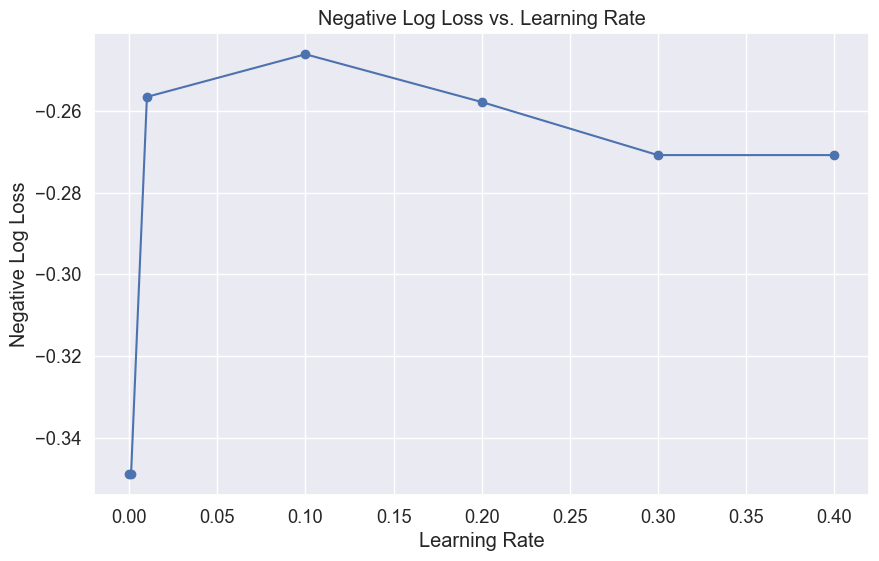

In [188]:
import matplotlib.pyplot as plt

# Extract learning rates and corresponding mean test scores
learning_rates = [params['learning_rate'] for params in params]
mean_test_scores = means

# Plot the negative log loss vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_test_scores, marker='o', linestyle='-')
plt.title('Negative Log Loss vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Negative Log Loss')
plt.grid(True)
plt.show()
